# [Used Car Prices Predict Project]

- 1. Libraries and Data Loading
- 2. Identification Statistic Data Type each Feature
- 3. Statistic Test
- 4. NaN Values Handling
- 5. Categorical Variable Handling
- 6. Outliers Handling
- 7. Check Correlation Beetween Independent and Dependent Feature
- 8. Visualization
- 9. Machine Learning Models
- 10. Model Evaluation
- 11. Selection

# [Libraries and Data Loading]

In [310]:
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pingouin import pairwise_ttests

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
np.set_printoptions(threshold=sys.maxsize)


In [2]:
dfRaw = pd.read_csv('car_ad.csv', encoding ='iso-8859-9')

In [3]:
df = pd.read_csv('car_ad.csv', encoding ='iso-8859-9')

# https://www.kaggle.com/antfarol/car-sale-advertisements

In [701]:
dfRaw.describe()

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


## [Identification Statistic Data Type each Feature]

In [702]:
dfRaw.head(20)

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.000,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.000,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.000,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.000,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.000,vagon,91,NaN,Other,yes,2013,E-Class,NaN
5,Nissan,16600.000,crossover,83,2.0,Petrol,yes,2013,X-Trail,full
6,Honda,6500.000,sedan,199,2.0,Petrol,yes,2003,Accord,front
7,Renault,10500.000,vagon,185,1.5,Diesel,yes,2011,Megane,front
8,Mercedes-Benz,21500.000,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.000,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [720]:
cols = list(dfRaw.columns)
typeData = ['categorical','continuous','categorical','continuous',
       'categorical','categorical','categorical','continuous',
       'categorical','categorical']

dfDataType = pd.DataFrame()
dfDataType['Feature'] = cols
dfDataType['Type'] = typeData

In [722]:
def highlight_cells(x):
    df = x.copy()
    df.iloc[1,0] = 'background-color: red'
    df.iloc[1,1] = 'background-color: red'
    df.iloc[3,0] = 'background-color: yellow'
    df.iloc[3,1] = 'background-color: yellow'
    df.iloc[7,0] = 'background-color: yellow'
    df.iloc[7,1] = 'background-color: yellow'    
    return df 


t = dfDataType.style.apply(highlight_cells, axis=None)
t

,Feature,Type
0,car,categorical
1,price,continuous
2,body,categorical
3,mileage,continuous
4,engV,categorical
5,engType,categorical
6,registration,categorical
7,year,continuous
8,model,categorical
9,drive,categorical


# [Statistic Test]

In [8]:
dfRaw.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [552]:
print('number of brand : ',len(dfRaw['car'].unique()))

number of brand :  87


In [9]:
top5Car = dfRaw['car'].value_counts().head()
top5Car

Volkswagen       936
Mercedes-Benz    921
BMW              694
Toyota           541
VAZ              489
Name: car, dtype: int64

In [10]:
top20Year = sorted(dfRaw['year'].value_counts().head(21).keys())
top20Year

[1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

#### [selecting data]

In [11]:
idx = []

def selectCarYear(dfRaw):
    car = list(dfRaw['car'].value_counts().head().keys())
    year = list(dfRaw['year'].value_counts().head(21).keys())
    for i in car:
        for j in year:
            index = list(dfRaw[(dfRaw['car'] == i) & (dfRaw['year'] == j)].index)
            idx.extend(index)
        

selectCarYear(dfRaw)

dfCarYear = dfRaw.iloc[idx]

In [555]:
print('Number of Data')
print('before selecting data :',top5Car.sum())
print('after selecting data :',len(idx))
print('difference :', (top5Car.sum()-len(idx)))

Number of Data
before selecting data : 3581
after selecting data : 3208
difference : 373


In [13]:
dfCarYear.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
35,Volkswagen,8999.0,sedan,120,2.0,Petrol,yes,2008,Passat B6,front
99,Volkswagen,20000.0,crossover,115,2.5,Diesel,yes,2008,Touareg,full
268,Volkswagen,12199.0,vagon,149,2.0,Diesel,yes,2008,Passat B6,front
384,Volkswagen,0.0,vagon,217,2.0,Diesel,no,2008,Passat B6,full
440,Volkswagen,11000.0,vagon,210,1.9,Diesel,yes,2008,Touran,front


In [14]:
lstCar = list(dfCarYear['car'].value_counts().head().keys())
lstCar

['Mercedes-Benz', 'Volkswagen', 'BMW', 'Toyota', 'VAZ']

#### [normal test]

In [717]:
from scipy.stats import shapiro
def try_normal(data):
    result = {'Shapiro': shapiro(data)[1]}
    return result

In [718]:
print(try_normal(dfRaw['price']))

{'Shapiro': 0.0}


In [710]:
dfCarYear['price'].mean()

20511.842661783045

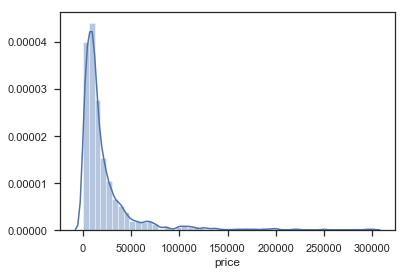

/Users/dimas/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning:

The package pingouin is out of date. Your version is 0.3.2, the latest is 0.3.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.



In [17]:
sns.distplot(dfCarYear['price'])

result : non normal distribution (non parametric) cause p-value < 0.05

#### [variance test - non parametric]

In [18]:
from scipy.stats import levene

def tryEqualVar(x1,x2):
    result = {'Levene': {'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result

In [19]:
def varianceTest(car):
    for i in car:
        for j in car:
            if i != j:
                print(i,'-',j)
                print(tryEqualVar(dfCarYear[dfCarYear['car'] == i]['price'], 
                    dfCarYear[dfCarYear['car'] == j]['price']))
                
        
    

varianceTest(lstCar)

    


Mercedes-Benz - Volkswagen
{'Levene': {'Levene-Stat': 127.93642381172745, 'P-Value': 1.1684015905536113e-28}}
Mercedes-Benz - BMW
{'Levene': {'Levene-Stat': 11.469012684915072, 'P-Value': 0.0007260692997486319}}
Mercedes-Benz - Toyota
{'Levene': {'Levene-Stat': 32.88260935956559, 'P-Value': 1.2012053368253608e-08}}
Mercedes-Benz - VAZ
{'Levene': {'Levene-Stat': 100.54151952997321, 'P-Value': 8.888971740567289e-23}}
Volkswagen - Mercedes-Benz
{'Levene': {'Levene-Stat': 127.93642381172745, 'P-Value': 1.1684015905536113e-28}}
Volkswagen - BMW
{'Levene': {'Levene-Stat': 195.38120616294427, 'P-Value': 8.368792252562836e-42}}
Volkswagen - Toyota
{'Levene': {'Levene-Stat': 43.13559287711153, 'P-Value': 7.227411104950235e-11}}
Volkswagen - VAZ
{'Levene': {'Levene-Stat': 128.70187396918803, 'P-Value': 2.1178035689373076e-28}}
BMW - Mercedes-Benz
{'Levene': {'Levene-Stat': 11.469012684915072, 'P-Value': 0.0007260692997486319}}
BMW - Volkswagen
{'Levene': {'Levene-Stat': 195.38120616294427, 'P-Va

result = all of data have unequal variance with another data (p-value < 0.05)

#### [Pairwise Test - non parametric]

In [20]:
dfCarYear['car'].unique()

array(['Volkswagen', 'Mercedes-Benz', 'BMW', 'Toyota', 'VAZ'],
      dtype=object)

In [21]:
dfVolks = dfCarYear[dfCarYear['car'] == 'Volkswagen']['price']
dfMerc = dfCarYear[dfCarYear['car'] == 'Mercedes-Benz']['price']
dfBmw = dfCarYear[dfCarYear['car'] == 'BMW']['price']
dfTyt = dfCarYear[dfCarYear['car'] == 'Toyota']['price']
dfVaz = dfCarYear[dfCarYear['car'] == 'VAZ']['price']

kruskal(dfVolks,dfMerc,dfBmw,dfTyt,dfVaz)

KruskalResult(statistic=705.9847746660115, pvalue=1.76338827980874e-151)

result = P-Value < 0.05 it means H1 accepted : it means there is significant difference of price value between car brand

#### [Post Hoc Test - non parametric]

In [22]:
pairwise_ttests(data=dfCarYear, dv='price', 
                between='car', parametric=False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,car,Volkswagen,Mercedes-Benz,False,False,293878.0,two-sided,4.817228e-13,-0.514
1,car,Volkswagen,BMW,False,False,208459.0,two-sided,4.687797e-14,-0.611
2,car,Volkswagen,Toyota,False,False,138090.5,two-sided,4.182912e-32,-0.549
3,car,Volkswagen,VAZ,False,False,265438.0,two-sided,2.917036e-110,1.064
4,car,Mercedes-Benz,BMW,False,False,265839.5,two-sided,4.486086e-01,0.152
5,car,Mercedes-Benz,Toyota,False,False,204921.5,two-sided,8.347393e-03,0.202
6,car,Mercedes-Benz,VAZ,False,False,257830.5,two-sided,3.665213e-94,0.723
7,car,BMW,Toyota,False,False,158924.5,two-sided,3.370000e-01,0.082
8,car,BMW,VAZ,False,False,190408.5,two-sided,6.374297e-88,1.102
9,car,Toyota,VAZ,False,False,169814.0,two-sided,1.192498e-115,1.118


all of p-unc have value less than alpha (0,05), it means H1 accepted, so there is significant difference between price each car brand

#### [Conclusion of Statistic Test]

1. Data of feature price have non normal distribution
2. Data of feature price each car brand have unequel variance with another car brand
4. Price value have significant difference based on car brand
3. There is significant difference of price value between car brand with another car brand

# [Replacing NaN Values and Zero Values]

I would handling Nan values and zero values based on result of statistic test

In [23]:
df.isna().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

In [24]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round(((df[col].isna().sum())/len(df))*100,2), 
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)


for i in ['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample']:
    dfDesc[i] = dfDesc[i].astype('str')
    
def highlight_cells(x):
    df = x.copy()
    df.iloc[4,2] = 'background-color: orange'
    df.iloc[4,3] = 'background-color: orange'
    df.iloc[9,2] = 'background-color: orange'
    df.iloc[9,3] = 'background-color: orange'
    return df 


t = dfDesc.style.apply(highlight_cells, axis=None)
t
    
    
# dfDesc.info()
# dfDataType.info()

,data features,dataType,null,nullPct,unique,uniqueSample
0,car,object,0,0.0,87,"['Isuzu', 'Saab']"
1,price,float64,0,0.0,1353,"[31111.0, 5450.0]"
2,body,object,0,0.0,6,"['crossover', 'sedan']"
3,mileage,int64,0,0.0,442,"[76, 298]"
4,engV,float64,434,4.53,117,"[1.23, 5.2]"
5,engType,object,0,0.0,4,"['Other', 'Diesel']"
6,registration,object,0,0.0,2,"['yes', 'no']"
7,year,int64,0,0.0,56,"[1987, 2012]"
8,model,object,0,0.0,888,"['Escalade', 'Land Cruiser 200']"
9,drive,object,511,5.34,3,"[nan, 'full']"


In [25]:
print('number of rows who have zero price : ' + str(len(df[df['price'] == 0.0])))

number of rows who have zero price : 267


There is three task :
1. handling nan value of engV feature
2. handling nan value of drive feature
3. handling price value who have zero value

In [564]:
dfRaw.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [704]:
import math
ttl = dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class')]['drive'].value_counts().sum()
rear = (dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class') & (dfRaw['drive']=='rear')]['drive'].value_counts().sum())
full = (dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class') & (dfRaw['drive']=='full')]['drive'].value_counts().sum())
front = (dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class') & (dfRaw['drive']=='front')]['drive'].value_counts().sum())
prcntRear = round((rear/ttl)*100,2)
prcntFull = round((full/ttl)*100,2)
prcntFront = round((front/ttl)*100,2)
print('Nan Handling For Drive')
print('')
print('sedan category on body feature and E-Class category on model feature')
print('')
print('total:',dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class')]['drive'].value_counts().sum())
print('rear:',(dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class') & (dfRaw['drive']=='rear')]['drive'].value_counts().sum()), '-->', prcntRear, '%')
print('full:',(dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class') & (dfRaw['drive']=='full')]['drive'].value_counts().sum()),'-->', prcntFull, '%')
print('front:',(dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class') & (dfRaw['drive']=='front')]['drive'].value_counts().sum()),'-->', prcntFront, '%')

print('')
print('total Nan value:', len(pd.isnull(dfRaw[(dfRaw['body']=='sedan') & (dfRaw['model']=='E-Class')]['drive']).nonzero()[0]))
print('rear Nan:', math.floor((12*prcntRear)/100), f'--> (12*{prcntRear})/100)')
print('full Nan:', math.ceil((12*prcntFull)/100), f'--> (12*{prcntFull})/100)')
print('front Nan:', math.ceil((12*prcntFront)/100), f'--> (12*{prcntFront})/100)')


Nan Handling For Drive

sedan category on body feature and E-Class category on model feature

total: 155
rear: 140 --> 90.32 %
full: 10 --> 6.45 %
front: 5 --> 3.23 %

total Nan value: 12
rear Nan: 10 --> (12*90.32)/100)
full Nan: 1 --> (12*6.45)/100)
front Nan: 1 --> (12*3.23)/100)


/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



In [677]:
dfNan = dfRaw[(dfRaw['body']=='sedan') &(dfRaw['model']=='E-Class')]
idxDfNan = dfNan[dfNan['drive'].isna()].index
dfRaw.iloc[idxDfNan]

,car,price,body,mileage,engV,engType,registration,year,model,drive
52,Mercedes-Benz,31500.0,sedan,123,2.2,Diesel,yes,2011,E-Class,NaN
119,Mercedes-Benz,29500.0,sedan,37,1.8,Petrol,yes,2012,E-Class,NaN
601,Mercedes-Benz,3550.0,sedan,274,3.2,Diesel,no,2002,E-Class,NaN
1051,Mercedes-Benz,4700.0,sedan,280,2.8,Petrol,yes,1993,E-Class,NaN
1822,Mercedes-Benz,6800.0,sedan,286,NaN,Other,yes,2000,E-Class,NaN
2329,Mercedes-Benz,0.0,sedan,245,2.2,Diesel,yes,2002,E-Class,NaN
2494,Mercedes-Benz,19700.0,sedan,220,2.2,Diesel,yes,2009,E-Class,NaN
4540,Mercedes-Benz,2500.0,sedan,111,2.3,Gas,yes,1992,E-Class,NaN
5442,Mercedes-Benz,2000.0,sedan,320,2.2,Diesel,no,1998,E-Class,NaN
6078,Mercedes-Benz,5000.0,sedan,240,2.2,Diesel,no,2004,E-Class,NaN


In [635]:
idxEnVNan = pd.isnull(df['engV']).nonzero()[0]
idxDriveNan = pd.isnull(df['drive']).nonzero()[0]

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead



In [27]:
def fillMed_EngV(idx):
    dfDrv = df.iloc[idx]
    dfCpy = dfRaw.copy()
    for i in idx:
        car = df['car'][i]
        model = df['model'][i]
        body = df['body'][i]
        
        items = dfCpy[(dfCpy['body']==body) & (dfCpy['model']==model)]['engV'].value_counts()
        sums = dfCpy[(dfCpy['body']==body) & (dfCpy['model']==model)]['engV'].value_counts().sum()
        
        try:
            count = 0
            for j in items.keys():
                totalDfCpy = len(dfCpy[(dfCpy['body']==body) & (dfCpy['model']==model) & (dfCpy['engV']==j)])
                percentageDfCpy = (totalDfCpy/sums)*100
            
                total = len(dfDrv[(dfDrv['body']==body) & (dfDrv['model']==model)])
                amount = len(dfDrv[(dfDrv['body']==body) & (dfDrv['model']==model) & (dfDrv['engV']==j)])
                percentageDfDrv = (amount/total)*100

                if percentageDfDrv <= percentageDfCpy:
                    dfDrv['engV'][i] = j
                    df['engV'][i] = j
                    break
                else :
                    count += 1
                    continue
                
            if count == len(items.keys()):
                df['engV'][i] = df[df['body']==body]['engV'].mode()[0]
                    

        except:
            df['engV'][i] = df['engV'].mode()[0]
        
        
def fill_Drive(idx):
    dfDrv = df.iloc[idx]
    dfCpy = df.copy()
    for i in idx:
        car = df['car'][i]
        model = df['model'][i]
        body = df['body'][i]
        
        items = dfCpy[(dfCpy['body']==body) & (dfCpy['model']==model)]['drive'].value_counts()
        sums = dfCpy[(dfCpy['body']==body) & (dfCpy['model']==model)]['drive'].value_counts().sum()
        
        try:
            count = 0
            for j in items.keys():
                totalDfCpy = len(dfCpy[(dfCpy['body']==body) & (dfCpy['model']==model) & (dfCpy['drive']==j)])
                percentageDfCpy = (totalDfCpy/sums)*100
            
                total = len(dfDrv[(dfDrv['body']==body) & (dfDrv['model']==model)])
                amount = len(dfDrv[(dfDrv['body']==body) & (dfDrv['model']==model) & (dfDrv['drive']==j)])
                percentageDfDrv = (amount/total)*100
                
                if percentageDfDrv <= percentageDfCpy:
                    dfDrv['drive'][i] = j
                    df['drive'][i] = j
                    break
                else :
                    count += 1
                    continue
                
            if count == len(items.keys()):
                df['drive'][i] = df[df['body']==body]['drive'].mode()[0]
                
        except:
            df['drive'][i] = df['drive'].mode()[0]
            
        
            
def priceZeroHandling(model):
    for i in model:
        idx = list(df[(df['price']==0.0) & (df['model'] == i)].index)
        if df[df['model'] == i]['price'].mean() != 0.0:
            df['price'][idx] = df[df['model'] == i]['price'].mean()
        else:
            for j in idx:
                val = df[(df['engType'] == df['engType'][j]) & (df['car'] == df['car'][j]) & (df['year'] == df['year'][j])]['price'].mean()
                if val != 0.0:
                    df['price'][j] = val
                else:
                    val = df[(df['engType'] == df['engType'][j]) & (df['year'] <= df['year'][j]+5) & 
                                        (df['year'] >= df['year'][j] - 5)]['price'].mean()
                    df['price'][j] = val
            

#### Nan EngV Columns Handling

In [28]:
fillMed_EngV(idxEnVNan)

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying t

Difference Percentage

In [29]:
dfRawEngV = pd.DataFrame(dfRaw['engV'].value_counts())
dfEngV = pd.DataFrame(df['engV'].value_counts())

mergedDfEngV = dfEngV.merge(dfRawEngV, left_index=True, right_index=True)
mergedDfEngV.rename(columns={'engV_x':'engV', 'engV_y':'engV_Raw'}, inplace=True)

mergedDfEngV['%EngV'] = (mergedDfEngV['engV']/mergedDfEngV['engV'].sum()
                         )*100
mergedDfEngV['%EngV_Raw'] = (mergedDfEngV['engV_Raw']/mergedDfEngV['engV_Raw'].sum()
                         )*100

mergedDfEngV['% Difference'] = abs(mergedDfEngV['%EngV'] - mergedDfEngV['%EngV_Raw'])


mergedDfEngV.head()


,engV,engV_Raw,%EngV,%EngV_Raw,% Difference
2.0,1626,1539,16.979950,16.834391,0.145559
1.6,1295,1229,13.523392,13.443448,0.079944
1.5,726,692,7.581454,7.569460,0.011994
3.0,723,703,7.550125,7.689783,0.139658
1.8,609,585,6.359649,6.399037,0.039388


In [678]:
bias = mergedDfEngV['% Difference'].sum()/len(mergedDfEngV)
print('Mean of Difference Percentage : ', bias, '%')

Mean of Difference Percentage :  0.01782465176785586 %


In [679]:
print('The Highest Value of Difference : ' )
mergedDfEngV[mergedDfEngV['% Difference']==mergedDfEngV['% Difference'].max()]


The Highest Value of Difference : 


,engV,engV_Raw,%EngV,%EngV_Raw,% Difference
1.0,121,91,1.263576,0.995406,0.26817


#### Nan Drive Columns Handling

In [32]:
fill_Drive(idxDriveNan)

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: SettingWithCopyWarning:


A value is trying t

Difference Percentage

In [33]:
dfRawDrive = pd.DataFrame(dfRaw['drive'].value_counts())
dfDrive = pd.DataFrame(df['drive'].value_counts())

mergedDfDrive = dfDrive.merge(dfRawDrive, left_index=True, right_index=True)
mergedDfDrive.rename(columns={'drive_x':'drive', 'drive_y':'drive_Raw'}, inplace=True)

mergedDfDrive['%Drive'] = (mergedDfDrive['drive']/mergedDfDrive['drive'].sum()
                         )*100
mergedDfDrive['%Drive_Raw'] = (mergedDfDrive['drive_Raw']/mergedDfDrive['drive_Raw'].sum()
                         )*100

mergedDfDrive['% Difference'] = abs(mergedDfDrive['%Drive'] - mergedDfDrive['%Drive_Raw'])


mergedDfDrive



,drive,drive_Raw,%Drive,%Drive_Raw,% Difference
front,5524,5188,57.685881,57.231109,0.454773
full,2576,2500,26.900585,27.578599,0.678014
rear,1476,1377,15.413534,15.190292,0.223242


In [680]:
bias = mergedDfDrive['% Difference'].sum()/len(mergedDfDrive)
print('Mean of Difference Percentage : ', bias, '%')

Mean of Difference Percentage :  0.45200947456586604 %


In [35]:
print('The Highest Value of Difference : ' )
mergedDfDrive[mergedDfDrive['% Difference']==mergedDfDrive['% Difference'].max()]


The Highest Value of Difference : 


,drive,drive_Raw,%Drive,%Drive_Raw,% Difference
full,2576,2500,26.900585,27.578599,0.678014


In [36]:
priceZeroHandling(list(df[df['price']==0.0]['model'].unique()))

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:88: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [37]:
lstMeanPriceDfRaw = []
dfDiff = pd.DataFrame()
dfDiff['meanPriceDf'] = [df[df['price'] != 0.0]['price'].sum()/len(df['price'])]
dfDiff['meanPriceDfRaw'] = [dfRaw[dfRaw['price']!=0.0]['price'].sum()/len(dfRaw)]
dfDiff['Difference'] = dfDiff['meanPriceDf'] - dfDiff['meanPriceDfRaw']
dfDiff

,meanPriceDf,meanPriceDfRaw,Difference
0,16450.531858,15633.317316,817.214542


checking there is no longer nan value

In [38]:
df.isna().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [39]:
listItem = []

for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum())/len(df[col])), 
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['data features', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'], data=listItem)
dfDesc

,data features,dataType,null,nullPct,unique,uniqueSample
0,car,object,0,0.0,87,"[Peugeot, Aro]"
1,price,float64,0,0.0,1481,"[10460.0, 25999.0]"
2,body,object,0,0.0,6,"[vagon, other]"
3,mileage,int64,0,0.0,442,"[279, 109]"
4,engV,float64,0,0.0,117,"[15.0, 99.99]"
5,engType,object,0,0.0,4,"[Diesel, Petrol]"
6,registration,object,0,0.0,2,"[yes, no]"
7,year,int64,0,0.0,56,"[2010, 1973]"
8,model,object,0,0.0,888,"[Tourneo Connect ïàññ., 190]"
9,drive,object,0,0.0,3,"[full, rear]"


# [Categorical Variable Handling]

In [40]:
df1 = df.copy()

In [41]:
print('car : ' + str(len(df['car'].unique())))
print('body : ' + str(len(df['body'].unique())))
print('engType : ' + str(len(df['engType'].unique())))
print('registration : ' + str(len(df['registration'].unique())))
print('model : ' + str(len(df['model'].unique())))
print('drive : ' + str(len(df['drive'].unique())))

car : 87
body : 6
engType : 4
registration : 2
model : 888
drive : 3


#### Fill Car Column and Model Column With Mean Price Based on Themself

In [42]:
df1['carMeanPrice'] = 0
df1['modelMeanPrice'] = 0

In [43]:
def carHandling(car):
    for i in car:
        idx = list(df1[df1['car']==i].index)
        df1['carMeanPrice'][idx] = df1[df1['car'] == i].mean()[0]
        
def modelHandling(model):
    for i in model:
        idx = list(df1[df1['model']==i].index)
        df1['modelMeanPrice'][idx] = df1[df1['model'] == i].mean()[0]
        
        

In [44]:
carHandling(df1['car'].unique())
modelHandling(df1['model'].unique())

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



#### Create Dummies Variable for Column body, engType, registration and drive 

In [683]:
df1 = pd.get_dummies(data = df1, drop_first = True, columns = ['body','engType','registration','drive'])


In [684]:
df1.head()

,car,price,mileage,engV,year,model,carMeanPrice,modelMeanPrice,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Gas,engType_Other,engType_Petrol,registration_yes,drive_full,drive_rear
0,Ford,15500.0,68,2.5,2010,Kuga,10627.108263,19699.984182,0,0,0,0,0,1,0,0,1,1,0
1,Mercedes-Benz,20500.0,173,1.8,2011,E-Class,31680.420782,13134.670589,0,0,1,0,0,1,0,0,1,0,1
2,Mercedes-Benz,35000.0,135,5.5,2008,CL 550,31680.420782,35000.000000,0,1,0,0,0,0,0,1,1,0,1
3,Mercedes-Benz,17800.0,162,1.8,2012,B 180,31680.420782,17871.428571,0,0,0,0,1,0,0,0,1,0,0
4,Mercedes-Benz,33000.0,91,2.2,2013,E-Class,31680.420782,13134.670589,0,0,0,1,0,0,1,0,1,0,1


# [Outliers Handling]

In [46]:
df2 = df1.copy()
df2.head()

,car,price,mileage,engV,year,model,carMeanPrice,modelMeanPrice,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Gas,engType_Other,engType_Petrol,registration_yes,drive_full,drive_rear
0,Ford,15500.0,68,2.5,2010,Kuga,10627.108263,19699.984182,0,0,0,0,0,1,0,0,1,1,0
1,Mercedes-Benz,20500.0,173,1.8,2011,E-Class,31680.420782,13134.670589,0,0,1,0,0,1,0,0,1,0,1
2,Mercedes-Benz,35000.0,135,5.5,2008,CL 550,31680.420782,35000.000000,0,1,0,0,0,0,0,1,1,0,1
3,Mercedes-Benz,17800.0,162,1.8,2012,B 180,31680.420782,17871.428571,0,0,0,0,1,0,0,0,1,0,0
4,Mercedes-Benz,33000.0,91,2.2,2013,E-Class,31680.420782,13134.670589,0,0,0,1,0,0,1,0,1,0,1


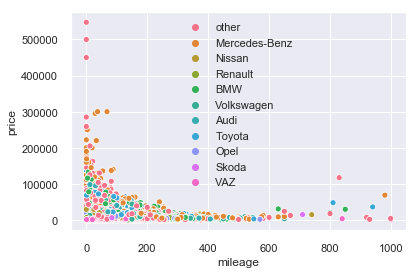

In [47]:
lstCar = []
top10Car = list(dfRaw.car.value_counts().iloc[:10].keys())

for i in list(dfRaw['car'].values):
    if i in top10Car:
        lstCar.append(i)
    else:
        lstCar.append('other')
    
set(lstCar)
lstCar

sns.set(font_scale=1)
sns.scatterplot(x="mileage", y="price", hue=lstCar,
                     data=dfRaw)


In [48]:
df1.describe()

,price,mileage,engV,year,carMeanPrice,modelMeanPrice,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Gas,engType_Other,engType_Petrol,registration_yes,drive_full,drive_rear
count,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000,9576.000000
mean,16450.531858,138.862364,2.617002,2006.605994,16450.531858,16450.531858,0.130744,0.087510,0.380744,0.075397,0.109545,0.179825,0.048246,0.457289,0.941416,0.269006,0.154135
std,24611.446940,98.629754,5.882179,7.067924,14268.858465,21248.057811,0.337137,0.282596,0.485595,0.264044,0.312338,0.384061,0.214296,0.498198,0.234857,0.443466,0.361097
min,253.116667,0.000000,0.100000,1953.000000,1000.000000,432.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,70.000000,1.600000,2004.000000,8769.521110,6505.962963,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,9600.000000,128.000000,2.000000,2008.000000,13093.708764,10740.705882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,17500.000000,194.000000,2.500000,2012.000000,23090.052351,17108.270833,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,547800.000000,999.000000,99.990000,2016.000000,220160.828125,547800.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
Q1_prc = df2['price'].describe()['25%']
Q3_prc = df2['price'].describe()['75%']
IQRCprc = Q3_prc - Q1_prc
df2 = df2[(df2['price'] >= Q1_prc - (1.5*IQRCprc)) & 
   (df2['price'] <= Q3_prc + (1.5*IQRCprc))]

df2.describe()

,price,mileage,engV,year,carMeanPrice,modelMeanPrice,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Gas,engType_Other,engType_Petrol,registration_yes,drive_full,drive_rear
count,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000,8633.000000
mean,10568.728165,149.117340,2.518245,2005.861462,14335.787662,11907.288955,0.143635,0.084559,0.399629,0.082590,0.117109,0.197035,0.047261,0.461717,0.935133,0.207228,0.156377
std,7427.366469,95.733486,6.172333,7.007909,8852.684449,9217.248020,0.350739,0.278241,0.489851,0.275278,0.321568,0.397782,0.212208,0.498561,0.246306,0.405344,0.363233
min,253.116667,0.000000,0.110000,1953.000000,1000.000000,432.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4999.000000,84.000000,1.600000,2003.000000,8392.172243,6400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,8777.000000,138.000000,2.000000,2007.000000,12686.314391,9970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,13999.000000,200.000000,2.400000,2011.000000,18461.326692,14817.363947,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,35500.000000,999.000000,99.990000,2016.000000,70833.333333,155012.833333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
print('number of rows before outliers handling: ' + str(len(df1)))
print('number of rows after outliers handling: ' + str(len(df2)))
print('percentage of rows eliminated :' + str(round(((len(df1)-len(df2))/len(df1))*100,2)) + ' %')

number of rows before outliers handling: 9576
number of rows after outliers handling: 8633
percentage of rows eliminated :9.85 %


In [51]:
lstCarDf2 = []
top10CarDf2 = list(df2.car.value_counts().iloc[:10].keys())

for i in list(df2['car'].values):
    if i in top10CarDf2:
        lstCarDf2.append(i)
    else:
        lstCarDf2.append('other')

Text(0.5, 1.0, 'Scatter Plot After outliers Handling')

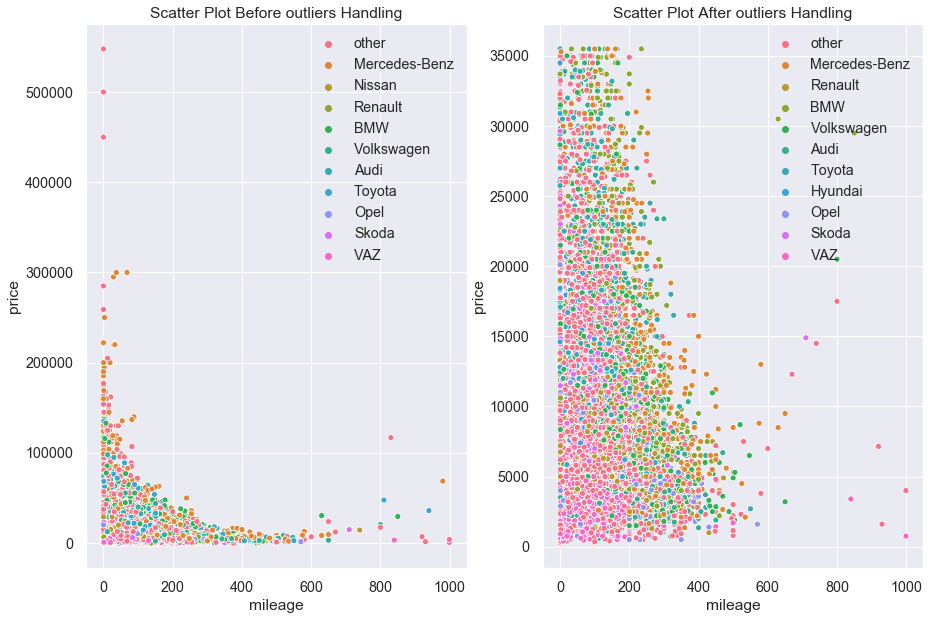

In [52]:
sns.set(font_scale=1.3)
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.scatterplot(x="mileage", y="price", hue=lstCar,
                     data=dfRaw)
plt.title('Scatter Plot Before outliers Handling')

plt.subplot(1,2,2)
sns.scatterplot(x="mileage", y="price", hue=lstCarDf2,
                     data=df2)
plt.title('Scatter Plot After outliers Handling')

In [53]:
dfRawCar = dfRaw['car'].unique()
df2Car = df2['car'].unique()
lstCarRemoved = []

for i in dfRawCar:
    if i not in df2Car:
        lstCarRemoved.append(i)

def carRemoved(car):
    numberOfCar = []
    averagePrice = []
    lstCarRemoved = []
    
    for i in car:
        lenCar = len(dfRaw[dfRaw['car'] == i])
        avgPrice = dfRaw[dfRaw['car'] == i]['price'].mean()
        
        lstCarRemoved.append([i,lenCar,round(avgPrice,2)])
        
    dfCarRemoved = pd.DataFrame(columns=['Car','Number Of Car','Avg Price'], data=lstCarRemoved)
    
    print(f'Impact from Handling Outliers is There is {len(dfCarRemoved)} Brand Vanished.')
    return dfCarRemoved


carRemoved(lstCarRemoved)

Impact from Handling Outliers is There is 7 Brand Vanished.


,Car,Number Of Car,Avg Price
0,Tesla,22,99509.09
1,Bentley,16,197504.62
2,Maserati,1,110000.00
3,Aston Martin,3,105000.00
4,Rolls-Royce,2,65000.00
5,Ferrari,2,167500.00
6,Lamborghini,1,130000.00


# [Check Correlation Beetween Independent and Dependent Feature]

In [54]:
def categoryHandling():
    feature = ['car','body','engType','registration','year','model','drive']
    for j in feature:
        dfCorr[j+'MeanPrice'] = 0
        for i in dfCorr[j].unique():
            idx = list(dfCorr[dfCorr[j]==i].index)
            dfCorr[j+'MeanPrice'][idx] = dfCorr[dfCorr[j] == i].mean()[0]
   
    for j in feature:
        del dfCorr[j]

In [55]:
df2.head()
df3 = df2.reset_index()
del df3['index']

dfCorr = df.copy()
categoryHandling()


/Users/dimas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [56]:
dfCorr.head()

,price,mileage,engV,carMeanPrice,bodyMeanPrice,engTypeMeanPrice,registrationMeanPrice,yearMeanPrice,modelMeanPrice,driveMeanPrice
0,15500.0,68,2.5,10627.108263,31929.633246,9602.349885,17214.288253,18249.763868,19699.984182,33590.399544
1,20500.0,173,1.8,31680.420782,12587.049288,9602.349885,17214.288253,20040.892873,13134.670589,14807.588027
2,35000.0,135,5.5,31680.420782,19953.703661,16709.444372,17214.288253,12459.162904,35000.000000,14807.588027
3,17800.0,162,1.8,31680.420782,11106.263110,19721.908486,17214.288253,18900.346397,17871.428571,8896.709616
4,33000.0,91,2.2,31680.420782,8982.481753,18186.751940,17214.288253,25379.426017,13134.670589,14807.588027


#### Check for Continuous with Continuous Variable

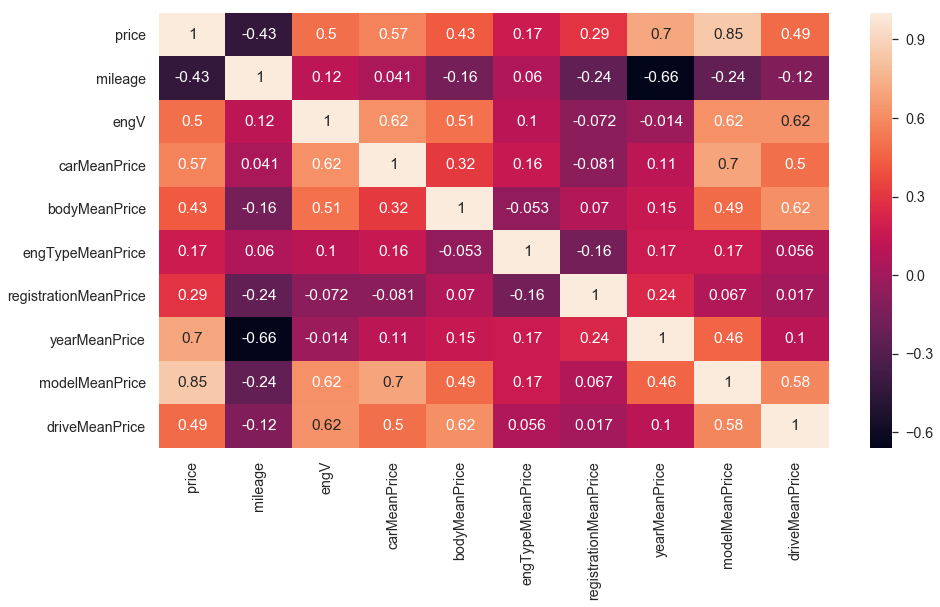

In [57]:
plt.figure(figsize=(15,8))
sns.heatmap(dfCorr.corr('spearman'), annot =True)

#### Check for Continuous with Categorical Variable

In [58]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [59]:
feature = []
corrRatio = []
dist = []
skwness = []
kurts = []

from scipy.stats import shapiro, anderson, skew, kurtosis
for i in dfCorr.select_dtypes(exclude = 'object').columns:
    feature.append(i)
    corrRatio.append(correlation_ratio(dfCorr['price'], dfCorr[i]))
    if shapiro(dfCorr[i])[1] < 0.05:
        dist.append('Not-Normal Distribution')
    else:
        dist.append('Normal Distribution')

    skwness.append(skew(dfCorr[i]))
    kurts.append(kurtosis(dfCorr[i]))


/Users/dimas/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



In [60]:
dfCorRatio = pd.DataFrame()
dfCorRatio['Feature'] = feature
dfCorRatio['Correlation Ratio'] = corrRatio
dfCorRatio['Distribution'] = dist
dfCorRatio['Skewness'] = skwness
dfCorRatio['Kurtosis'] = kurts

dfCorRatio

,Feature,Correlation Ratio,Distribution,Skewness,Kurtosis
0,price,1.000000,Not-Normal Distribution,6.966186,89.370574
1,mileage,0.578539,Not-Normal Distribution,1.298037,5.148159
2,engV,0.379020,Not-Normal Distribution,15.318534,244.054571
3,carMeanPrice,0.773655,Not-Normal Distribution,6.239905,74.476589
4,bodyMeanPrice,0.652131,Not-Normal Distribution,1.053840,-0.565150
5,engTypeMeanPrice,0.399406,Not-Normal Distribution,-1.121330,0.011551
6,registrationMeanPrice,0.484595,Not-Normal Distribution,-3.759222,12.131748
7,yearMeanPrice,0.847862,Not-Normal Distribution,2.058948,4.360672
8,modelMeanPrice,0.935816,Not-Normal Distribution,7.719307,126.553357
9,driveMeanPrice,0.681865,Not-Normal Distribution,0.927954,-1.012163


# Visualization

In [408]:
dfVisual = df.copy()

Q1_prc = dfVisual['price'].describe()['25%']
Q3_prc = dfVisual['price'].describe()['75%']
IQRCprc = Q3_prc - Q1_prc
dfVisual = dfVisual[(dfVisual['price'] >= Q1_prc - (1.5*IQRCprc)) & 
   (dfVisual['price'] <= Q3_prc + (1.5*IQRCprc))]

dfVisual = dfVisual.reset_index()
del dfVisual['index']

In [439]:
dfVisual.to_csv('dataDash.csv')

In [409]:
dfVisual.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,2.2,Other,yes,2013,E-Class,rear


In [411]:
pd.DataFrame(dfVisual['car'].value_counts().head(10))

,car
Volkswagen,890
Mercedes-Benz,685
BMW,531
VAZ,489
Renault,469
Toyota,463
Opel,400
Audi,391
Skoda,367
Hyundai,361


In [453]:
# df['car'].value_counts()
dfVisual.car.value_counts().iloc[:10].values  - [1000,1000,1000,1000,1000,1000,1000,1000,1000,1000]

array([-110, -315, -469, -511, -531, -537, -600, -609, -633, -639])

Text(0.5, 1.0, 'The most 10 Number of Car for Sale By Brand')

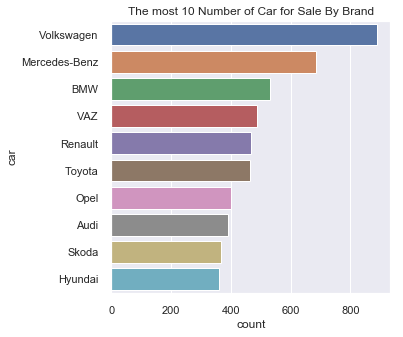

In [412]:
sns.set(font_scale=1)
plt.figure(figsize =(5,5))
sns.countplot(y='car', data = dfVisual, order=dfVisual.car.value_counts().iloc[:10].index)
plt.title('The most 10 Number of Car for Sale By Brand')


Text(0.5, 1.0, 'The most 10 Number of Car for Sale By Year')

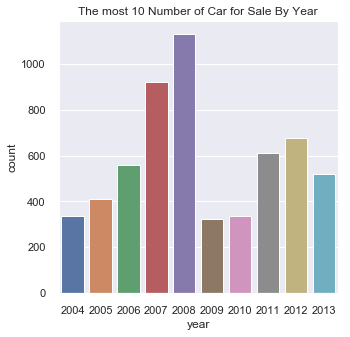

In [415]:
year = list(dfVisual['year'].value_counts().iloc[:10].keys())
listYear = []
for i in year:
    listYear += list(dfVisual[dfVisual['year'] == i].index)

dfVisualYear = dfVisual.iloc[listYear]


sns.set(font_scale=1)
plt.figure(figsize =(5,5))
sns.countplot(dfVisualYear['year'])
plt.title('The most 10 of Cars for Sale By Year')


Text(0.5, 1.0, 'Most preferred body type used in 1953-2016')

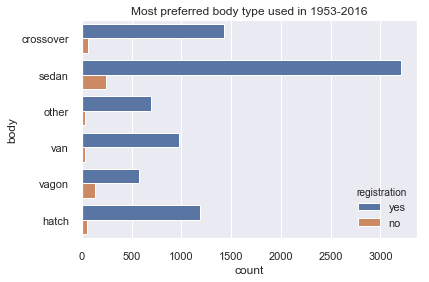

In [456]:
sns.countplot(y='body', data=dfVisual, orient='h', hue='registration')
plt.title("Most preferred body type used in 1953-2016")

Text(0.5, 1.0, 'Most preferred engType used over the years')

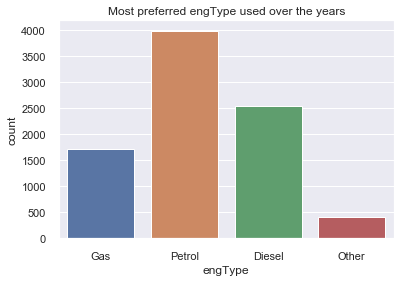

In [427]:
sns.countplot(x='engType', data=dfVisual, orient='h')
plt.title("Most preferred engType used over the years")

Text(0.5, 1.0, 'year - price lineplot (1950 - 2010)')

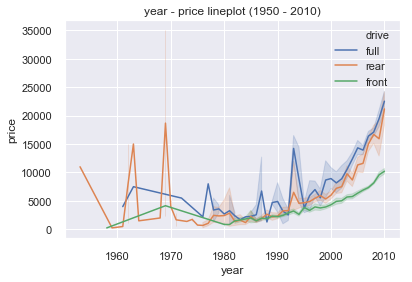

In [707]:
sns.lineplot(data=dfVisual[dfVisual.year <= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (1950 - 2010)")

Text(0.5, 1.0, 'year - price lineplot (2010 - 2016)')

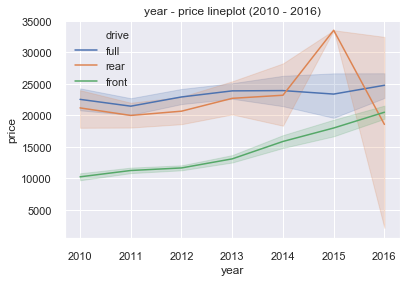

In [431]:
sns.lineplot(data=dfVisual[dfVisual.year >= 2010], y='price', x='year', hue='drive')
plt.title("year - price lineplot (2010 - 2016)")

Text(0.5, 1.0, 'mileage - price line Plot')

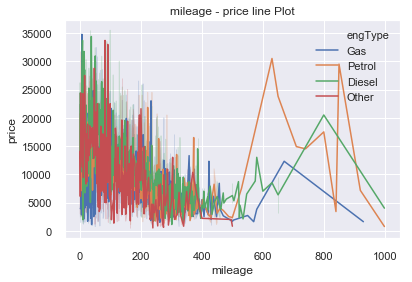

In [436]:
sns.lineplot(x='mileage',y='price',data=dfVisual, hue='engType')
plt.title("mileage - price line Plot")

Text(0.5, 1.0, 'Price distribution over the year to engType')

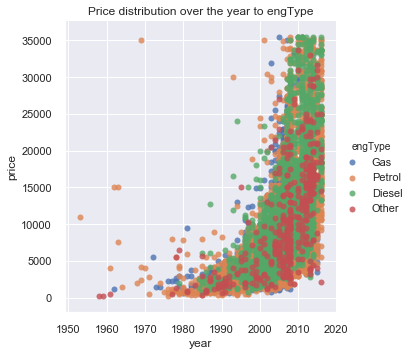

In [437]:
sns.lmplot('year','price', dfVisual, fit_reg=False, hue='engType')
plt.title("Price distribution over the year to engType")

In [698]:
df['engV'].unique().max()

99.99

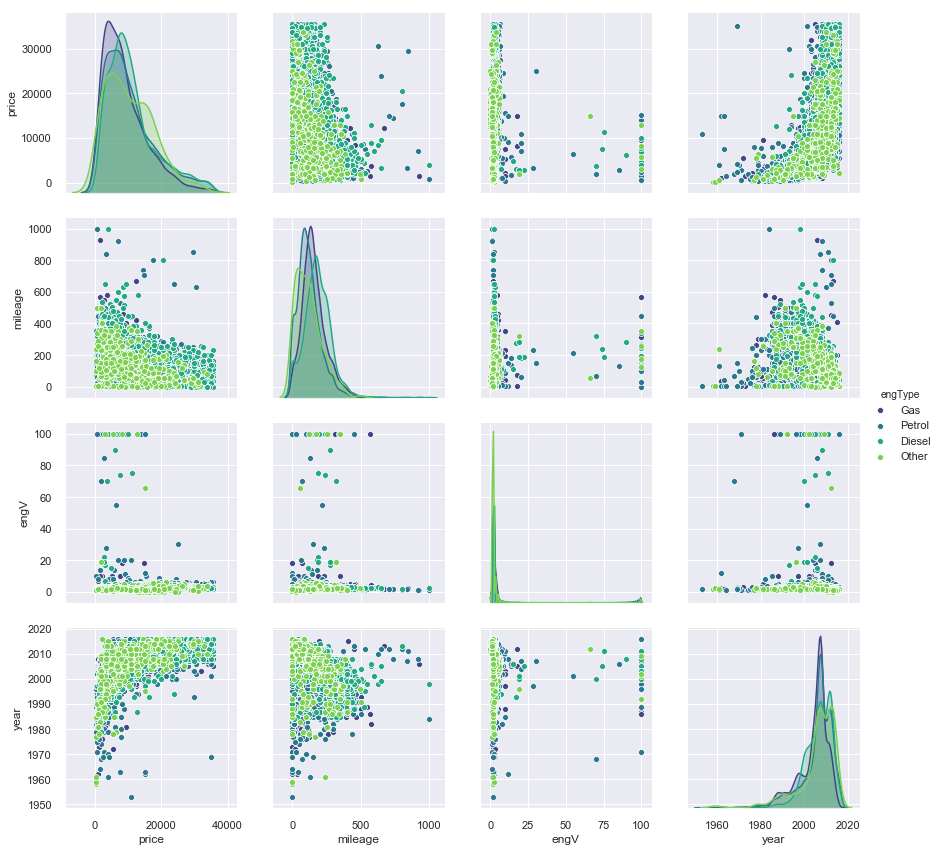

In [438]:
# sns.pairplot(dfVisual[['price','mileage','engV','year']])

sns.pairplot(dfVisual, hue='engType', palette="viridis", height=3)

# [Machine Learning Models]

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

## Splitting Data

In [66]:
df2.head()

,car,price,mileage,engV,year,model,carMeanPrice,modelMeanPrice,body_hatch,body_other,body_sedan,body_vagon,body_van,engType_Gas,engType_Other,engType_Petrol,registration_yes,drive_full,drive_rear
0,Ford,15500.0,68,2.5,2010,Kuga,10627.108263,19699.984182,0,0,0,0,0,1,0,0,1,1,0
1,Mercedes-Benz,20500.0,173,1.8,2011,E-Class,31680.420782,13134.670589,0,0,1,0,0,1,0,0,1,0,1
2,Mercedes-Benz,35000.0,135,5.5,2008,CL 550,31680.420782,35000.000000,0,1,0,0,0,0,0,1,1,0,1
3,Mercedes-Benz,17800.0,162,1.8,2012,B 180,31680.420782,17871.428571,0,0,0,0,1,0,0,0,1,0,0
4,Mercedes-Benz,33000.0,91,2.2,2013,E-Class,31680.420782,13134.670589,0,0,0,1,0,0,1,0,1,0,1


In [67]:
X = df2.drop(['car','price','model'], axis=1)
# X = df2[['carMeanPrice','modelMeanPrice']]
y = df2['price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state= 101)


In [809]:
X.to_csv('dfPred.csv')

## Decission Tree Regressor

In [69]:
dtree_reg = DecisionTreeRegressor()

dtree_params = {
    'max_depth': [25,50,100,150,200],
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [25,50,100,150,200],
    'max_features': ["auto", "sqrt", "log2"],
    'max_leaf_nodes': [25,50,100,150,200] }

#### Randomized Search CV

In [70]:
dtree_randomsearch = RandomizedSearchCV(estimator=dtree_reg,
                                param_distributions = dtree_params,
                                n_iter=100,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

dtree_randomsearch.fit(X_train,y_train)
bestPrmDtreeRndmSearch = dtree_randomsearch.best_params_

In [71]:
DtreeRsMinSamplesSplit = bestPrmDtreeRndmSearch['min_samples_split']
DtreeRsMinSamplesLeaf = bestPrmDtreeRndmSearch['min_samples_leaf']
DtreeRsMaxLeafNodes = bestPrmDtreeRndmSearch['max_leaf_nodes']
DtreeRsMaxFeatures = bestPrmDtreeRndmSearch['max_features']
DtreeRsMaxDepth = bestPrmDtreeRndmSearch['max_depth']

In [72]:
bestPrmDtreeRndmSearch

{'min_samples_split': 8,
 'min_samples_leaf': 25,
 'max_leaf_nodes': 200,
 'max_features': 'auto',
 'max_depth': 50}

In [73]:
dtree_reg = DecisionTreeRegressor(min_samples_split=DtreeRsMinSamplesSplit, 
                                  min_samples_leaf=DtreeRsMinSamplesLeaf, 
                                  max_leaf_nodes= DtreeRsMaxLeafNodes,
                                  max_features=DtreeRsMaxFeatures, 
                                  max_depth= DtreeRsMaxDepth)
dtree_reg.fit(X_train,y_train)
y_train_DtrRandomSearch_pred = dtree_reg.predict(X_train)
y_test_DtrRandomSearch_pred = dtree_reg.predict(X_test) 

Model Performance RandomizedSearchCV

In [74]:
print('Result Model Performance Randomized Search CV : ')

print(' ')

from sklearn import metrics
print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_DtrRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_DtrRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_DtrRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_DtrRandomSearch_pred))

print(' ')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_DtrRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_DtrRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_DtrRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_DtrRandomSearch_pred))


Result Model Performance Randomized Search CV : 
 
Y Train
MAE: 1722.4884372590468
MSE: 7562906.081677661
RMSE: 2750.07383204118
R2  Score: 0.8605671252573523
 
Y Test
MAE: 1871.5229756944957
MSE: 8738709.519945096
RMSE: 2956.1308360668168
R2  Score: 0.8474427880878467


#### Grid Search CV

In [75]:
def Grid_Search_CV(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit

    grid = GridSearchCV(dtree_reg, dtree_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_params_

In [76]:
bestPrmDtreeGridSearch = Grid_Search_CV(X_train, y_train)

In [77]:
bestPrmDtreeGridSearch

{'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': 200,
 'min_samples_leaf': 25,
 'min_samples_split': 2}

In [78]:
DtreeGsMinSamplesSplit = bestPrmDtreeGridSearch['min_samples_split']
DtreeGsMinSamplesLeaf = bestPrmDtreeGridSearch['min_samples_leaf']
DtreeGsMaxLeafNodes = bestPrmDtreeGridSearch['max_leaf_nodes']
DtreeGsMaxFeatures = bestPrmDtreeGridSearch['max_features']
DtreeGsMaxDepth = bestPrmDtreeGridSearch['max_depth']

In [79]:
dtree_reg = DecisionTreeRegressor(min_samples_split=DtreeGsMinSamplesSplit, 
                                  min_samples_leaf=DtreeGsMinSamplesLeaf, 
                                  max_leaf_nodes= DtreeGsMaxLeafNodes,
                                  max_features=DtreeGsMaxFeatures, 
                                  max_depth= DtreeGsMaxDepth)
dtree_reg.fit(X_train,y_train)
y_train_DtrGridSearch_pred = dtree_reg.predict(X_train)
y_test_DtrGridSearch_pred = dtree_reg.predict(X_test) 


Model Performance

In [80]:
print('Result Model Performance Grid Search CV : ')

print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_DtrGridSearch_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_DtrGridSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_DtrGridSearch_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_DtrGridSearch_pred))

print(' ')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_DtrGridSearch_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_DtrGridSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_DtrGridSearch_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_DtrGridSearch_pred))




Result Model Performance Grid Search CV : 

Y Train
MAE: 1722.4884372590468
MSE: 7562906.081677661
RMSE: 2750.07383204118
R2  Score: 0.8605671252573523
 
Y Test
MAE: 1871.5229756944957
MSE: 8738709.519945096
RMSE: 2956.1308360668168
R2  Score: 0.8474427880878467


## Random Forest

In [81]:
rfr = RandomForestRegressor()
rfr_params = { 
            "n_estimators" : [100,200,300,500],
            "max_features" : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth': [25, 50,100,150,200]
            }


#### RandomizedSearchCV

In [82]:
rfr_randomsearch = RandomizedSearchCV(estimator=rfr,
                                param_distributions = rfr_params,
                                n_iter=100,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

rfr_randomsearch.fit(X_train,y_train)
bestPrmRfrRndmSearch = rfr_randomsearch.best_params_

In [708]:
RfrRsMinNEstimators = bestPrmRfrRndmSearch['n_estimators']
RfrRsMaxFeatures = bestPrmRfrRndmSearch['max_features']
RfrRsMinSampleSplit = bestPrmRfrRndmSearch['min_samples_split']
RfrRsBootStrap = bestPrmRfrRndmSearch['bootstrap']
RfrRsMaxDepth = bestPrmRfrRndmSearch['max_depth']


In [86]:
rfr = RandomForestRegressor(n_estimators=RfrRsMinNEstimators, 
                            max_features=RfrRsMaxFeatures,
                            min_samples_split=RfrRsMinSampleSplit,
                            bootstrap = RfrRsBootStrap,
                            max_depth=RfrRsMaxDepth)
rfr.fit(X_train, y_train)

y_train_RfrRandomSearch_pred = rfr.predict(X_train)
y_test_RfrRandomSearch_pred = rfr.predict(X_test) 

In [87]:
print('Result Model Performance Randomized Search CV : ')

print(' ')

from sklearn import metrics
print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_RfrRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_RfrRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_RfrRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_RfrRandomSearch_pred))

print(' ')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_RfrRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_RfrRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_RfrRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_RfrRandomSearch_pred))



Result Model Performance Randomized Search CV : 
 
Y Train
MAE: 381.19552324536505
MSE: 419239.5579039068
RMSE: 647.4871102222088
R2  Score: 0.9922707255474192
 
Y Test
MAE: 1434.7398922228172
MSE: 5790503.88550642
RMSE: 2406.346584660327
R2  Score: 0.8989114895828577


#### Grid_Search_CV_RFR

In [88]:
def Rfr_Grid_Search_CV(X_train, y_train):
    grid = GridSearchCV(rfr, rfr_params, scoring='neg_mean_squared_error', n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    return grid.best_params_

In [89]:
bestPrmRfrGridSearch = Rfr_Grid_Search_CV(X_train, y_train)

In [709]:
RfrGsMinNEstimators = bestPrmRfrRndmSearch['n_estimators']
RfrGsMaxFeatures = bestPrmRfrRndmSearch['max_features']
RfrGsMinSampleSplit = bestPrmRfrRndmSearch['min_samples_split']
RfrGsBootStrap = bestPrmRfrRndmSearch['bootstrap']
RfrGsMaxDepth = bestPrmRfrRndmSearch['max_depth']


In [94]:
rfr = RandomForestRegressor(n_estimators=RfrGsMinNEstimators, 
                            max_features=RfrGsMaxFeatures,
                            min_samples_split=RfrGsMinSampleSplit,
                            bootstrap = RfrGsBootStrap,
                            max_depth=RfrGsMaxDepth)
rfr.fit(X_train, y_train)

y_train_RfrGridSearch_pred = rfr.predict(X_train)
y_test_RfrGridSearch_pred = rfr.predict(X_test) 


Model Performance

In [95]:
print('Result Model Performance Grid Search CV : ')

print(' ')

from sklearn import metrics
print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_RfrGridSearch_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_RfrGridSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_RfrGridSearch_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_RfrGridSearch_pred))

print(' ')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_RfrGridSearch_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_RfrGridSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_RfrGridSearch_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_RfrGridSearch_pred))




Result Model Performance Grid Search CV : 
 
Y Train
MAE: 382.2615492957262
MSE: 424111.98810213647
RMSE: 651.2388103469698
R2  Score: 0.9921808954024743
 
Y Test
MAE: 1440.1714798236917
MSE: 5784334.895487699
RMSE: 2405.0644264733737
R2  Score: 0.8990191855665063


## XGBoost

In [96]:
xgb = XGBRegressor()

xgb_params = {
    'n_estimators': [100,200,300,500],
    'max_depth': [25,50,100,150,200],
    'learning_rate': [0.01,0.03,0.05,0.1],
    'subsample': [0.2,0.4,0.6,0.8],
    'colsample_bytree': [0.2,0.4,0.6,0.8]
}


In [97]:
xgb_randomsearch = RandomizedSearchCV(estimator=xgb,
                                param_distributions = xgb_params,
                                n_iter=100,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1
                                )

xgb_randomsearch.fit(X_train,y_train)
bestPrmXgbRndmSearch = xgb_randomsearch.best_params_

/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[21:46:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [699]:
xgbRsMinNEstimators = bestPrmXgbRndmSearch['n_estimators']
xgbRsMaxDepth = bestPrmXgbRndmSearch['max_depth']
xgbRsLearningRate = bestPrmXgbRndmSearch['learning_rate']
xgbRsSubsample = bestPrmXgbRndmSearch['subsamaple']
xgbRsColsampleBytree = bestPrmXgbRndmSearch['colsample_bytree']

In [99]:
xgb = XGBRegressor(subsamaple= xgbRsSubsample,
                   n_estimators= xgbRsMinNEstimators,
                   max_depth= xgbRsMaxDepth,
                   learning_rate= xgbRsLearningRate,
                   colsample_bytree= xgbRsColsampleBytree)


xgb.fit(X_train, y_train)

y_train_XgbRandomSearch_pred = xgb.predict(X_train)
y_test_XgbRandomSearch_pred = xgb.predict(X_test) 

[21:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [100]:
print('Result Model Performance Randomized Search CV : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_XgbRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_XgbRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_XgbRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_XgbRandomSearch_pred))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_XgbRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_XgbRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_XgbRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_XgbRandomSearch_pred))


Result Model Performance Randomized Search CV : 

Y Train
MAE: 310.79046726184356
MSE: 355860.55439272925
RMSE: 596.5404884772946
R2  Score: 0.9934392071552098

Y Test
MAE: 1438.9384166311027
MSE: 5673580.807476501
RMSE: 2381.9279601777425
R2  Score: 0.9009526901459065


## Gradient Boost

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

gbr_params = {
    'max_depth': [25,50,100,150,200],
    'min_samples_split': [2,4,8],
    'min_samples_leaf': [25,50,100,150,200],
    'max_features': ["auto", "sqrt", "log2"],
    'max_leaf_nodes': [25,50,100,150,200] }

In [171]:
gbr_randomsearch = RandomizedSearchCV(estimator=gbr,
                                param_distributions = gbr_params,
                                n_iter=150,
                                scoring='neg_mean_squared_error',
                                cv=5,
                                n_jobs=-1,
                                random_state=101
                                )

gbr_randomsearch.fit(X_train,y_train)
bestPrmGbrRndmSearch = gbr_randomsearch.best_params_

In [181]:
gbrRsMinSamplesSplit = bestPrmGbrRndmSearch['min_samples_split']
gbrRsMinSamplesLeaf = bestPrmGbrRndmSearch['min_samples_leaf']
gbrRsMaxLeafNodes = bestPrmGbrRndmSearch['max_leaf_nodes']
gbrRsMaxFeatures = bestPrmGbrRndmSearch['max_features']
gbrRsMaxDepth = bestPrmGbrRndmSearch['max_depth']
bestPrmGbrRndmSearch

{'min_samples_split': 8,
 'min_samples_leaf': 25,
 'max_leaf_nodes': 100,
 'max_features': 'log2',
 'max_depth': 50}

In [193]:
gbr = GradientBoostingRegressor(min_samples_split=gbrRsMinSamplesSplit, 
                                  min_samples_leaf=gbrRsMinSamplesLeaf, 
                                  max_leaf_nodes= gbrRsMaxLeafNodes,
                                  max_features=gbrRsMaxFeatures, 
                                  max_depth= gbrRsMaxDepth)
gbr.fit(X_train,y_train)
y_train_GbrRandomSearch_pred = gbr.predict(X_train)
y_test_GbrRandomSearch_pred = gbr.predict(X_test)


In [194]:
print('Result Model Performance Random Search CV : ')
print('')

print('Y Train')
print('MAE:', metrics.mean_absolute_error(y_train, y_train_GbrRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_train_GbrRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_GbrRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_train, y_train_GbrRandomSearch_pred))

print('')

print('Y Test')
print('MAE:', metrics.mean_absolute_error(y_test, y_test_GbrRandomSearch_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_test_GbrRandomSearch_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_GbrRandomSearch_pred)))
print('R2  Score:', metrics.r2_score(y_test, y_test_GbrRandomSearch_pred))




Result Model Performance Random Search CV : 

Y Train
MAE: 1000.7050762063112
MSE: 2518500.0996078416
RMSE: 1586.9782921035314
R2  Score: 0.953567887114358

Y Test
MAE: 1420.8254109311267
MSE: 5559274.750485418
RMSE: 2357.8114323425907
R2  Score: 0.902948203707655


# [Model Evaluation]

In [549]:
from sklearn.model_selection import KFold

from sklearn.metrics import  mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score

#### Feature Importance

In [195]:
gbr.feature_importances_

array([0.0640983 , 0.0761187 , 0.21724704, 0.08669523, 0.45205808,
       0.00194264, 0.00082908, 0.00661329, 0.00059614, 0.00194352,
       0.00448468, 0.00090731, 0.00292228, 0.0378094 , 0.03777516,
       0.00795915])

In [501]:
coefs = pd.Series(gbr.feature_importances_,X_train.columns).sort_values()

dfFi = coefs.to_frame()
dfFi.rename(columns={0:'valFi'}, inplace=True)
dfFi.to_csv('dfFatureImportance.csv')
dfFi = pd.read_csv('dfFatureImportance.csv')
dfFi.rename(columns={'Unnamed: 0':'col'}, inplace=True)
dfFi.to_csv('dfFatureImportance.csv')


Text(0.5, 1.0, 'Feature Importance')

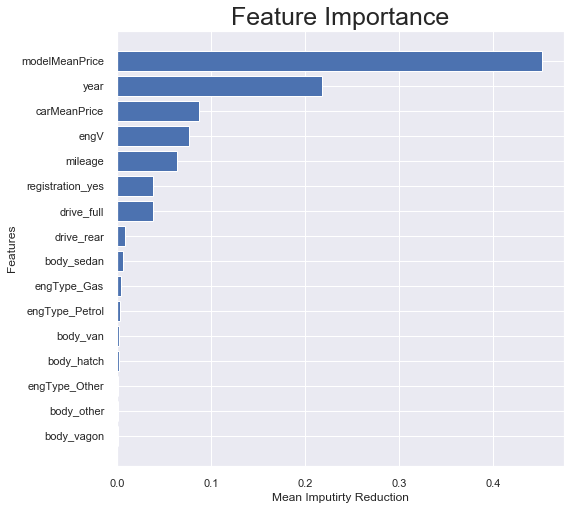

In [197]:
plt.figure(figsize=(8,8))
plt.barh(coefs.index,coefs.values)
plt.xlabel("Mean Imputirty Reduction")
plt.ylabel('Features')
plt.title('Feature Importance',fontsize=25)

#### Evaluation

In [349]:
K = 5
kF = KFold(n_splits = K, shuffle = True)
kfold_list = list(kF.split(X_train, y_train))

In [351]:
# Creating function to calculate train data error, validation data error and metric calculation
def calc_train_error(X_train, y_train, model):
    prediction = model.predict(X_train)
    mean_abs_error = mean_absolute_error(y_train,prediction)
    mean_sqr_error = mean_squared_error(y_train,prediction)
#     mean_sqr_log_error = mean_squared_log_error(y_train,prediction)
    median_abs_error = median_absolute_error(y_train,prediction)
    r2 = r2_score(y_train,prediction)
    rmse = np.sqrt(mean_sqr_error)

    return{
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error':mean_abs_error,
        'Mean Squared Error': mean_sqr_error,
#         'Mean Squared Log Error': mean_sqr_log_error,
        'Median Absolute Error': median_abs_error,
        'R2 score': r2
    }

def calc_validation_error(X_test, y_test, model):
    prediction = model.predict(X_test)
    mean_abs_error = mean_absolute_error(y_test,prediction)
    mean_sqr_error = mean_squared_error(y_test,prediction)
#     mean_sqr_log_error = mean_squared_log_error(y_test,prediction)
    median_abs_error = median_absolute_error(y_test,prediction)
    r2 = r2_score(y_test,prediction)
    rmse = np.sqrt(mean_sqr_error)

    return{
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error':mean_abs_error,
        'Mean Squared Error': mean_sqr_error,
#         'Mean Squared Log Error': mean_sqr_log_error,
        'Median Absolute Error': median_abs_error,
        'R2 score': r2
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error
    

In [352]:
dtreeEvaluationRs = DecisionTreeRegressor(**bestPrmDtreeRndmSearch)
dtreeEvaluationGs = DecisionTreeRegressor(**bestPrmDtreeGridSearch)

rfrEvaluationRs = RandomForestRegressor(**bestPrmRfrRndmSearch)
rfrEvaluationGs = RandomForestRegressor(**bestPrmRfrGridSearch)

xgbEvaluationRs = XGBRegressor(**bestPrmXgbRndmSearch)

gbrEvaluationRs = GradientBoostingRegressor(**bestPrmGbrRndmSearch)


# model_list = [eval_dtree,eval_rfr,eval_xgb,eval_ada_dtree,eval_ada_rfr]
# model_name = ['Dtree','RFR','XGB','AdaBoost & dtree','AdaBoost & RFR']

lstModel = [dtreeEvaluationRs,dtreeEvaluationGs,rfrEvaluationRs,rfrEvaluationGs,xgbEvaluationRs,gbrEvaluationRs]
modelName = ['DtreeRs','DtreeGs','RFRRs','RFRGs','XGB','GBR']

In [353]:
metrics = {}

for model,model_name_name in zip(lstModel,modelName):
    train_errors = []
    validation_errors = []
    for train_index, val_index, in kfold_list:

        # split X
        X_train_train, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_train, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        # instantiate model
        model = model

        # calculate errors
        train_error, val_error = calc_metrics(X_train_train, y_train_train, X_val, y_val, model)

        # append to appropirate list
        train_errors.append(train_error)
        validation_errors.append(val_error)
    metrics[model_name_name] = {'train_errors':train_errors,'validation_errors':validation_errors}

/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[07:11:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[07:12:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[07:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[07:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/dimas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[07:12:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [356]:
columns = pd.MultiIndex.from_product([['Root Mean Squared Error','Mean Absolute Error', 'Mean Squared Error','Median Absolute Error','R2 score'], ['DtreeRs','DtreeGs','RFRRs','RFRGs','XGB','GBR']],
                                     names=['Metric', 'Model'])

metric_df = pd.DataFrame(data=0,columns=columns,index=['{} Iteration'.format(i) for i in range(1,K+1)]+['Average'])
for i in list(metric_df.columns.get_level_values(0).drop_duplicates()):
    for k in range(5):
        temp = []
        for j in ['DtreeRs','DtreeGs','RFRRs','RFRGs','XGB','GBR']:

            temp.append(round(metrics[j]['validation_errors'][k][i],2))

        metric_df.loc['{} Iteration'.format(k+1),i] = temp
        
        
metric_avg = []
for i in list(metric_df.columns.get_level_values(0).drop_duplicates()):
    for j in ['DtreeRs','DtreeGs','RFRRs','RFRGs','XGB','GBR']:
        metric_avg.append(round(metric_df[i][j].iloc[:5].mean(),2))
#         print(i,j,metric_df[i][j].mean())
metric_df.loc['Average'] = metric_avg

In [357]:
# metric_df.columns.get_level_values(0).drop_duplicates()
metric_df

Metric      Root Mean Squared Error                                      \
Model                       DtreeRs  DtreeGs    RFRRs    RFRGs      XGB   
1 Iteration                 3165.24  3165.24  2387.47  2393.98  2362.46   
2 Iteration                 3145.38  3145.38  2367.83  2372.26  2368.18   
3 Iteration                 3080.31  3080.31  2425.74  2412.29  2425.24   
4 Iteration                 3106.61  3106.61  2307.37  2285.54  2329.65   
5 Iteration                 2991.75  2991.75  2424.30  2430.33  2530.14   
Average                     3097.86  3097.86  2382.54  2378.88  2403.13   

Metric               Mean Absolute Error                                      \
Model            GBR             DtreeRs  DtreeGs    RFRRs    RFRGs      XGB   
1 Iteration  2311.31             2016.01  2016.01  1470.47  1473.34  1473.22   
2 Iteration  2323.50             1973.31  1973.31  1444.50  1448.11  1470.09   
3 Iteration  2421.33             1964.18  1964.18  1481.37  1475.35  1480.29   
4 Iteration  2256.38             2012.90  2012.90  1431.82  1423.16  1451.69   
5 Iteration  2394.10             1866.54  1866.54  1451.77  1459.55  1484.67   
Average      2341.32             1966.59  1966.59  1455.99  1455.90  1471.99   

Metric               Mean Squared Error                                       \
Model            GBR            DtreeRs      DtreeGs       RFRRs       RFRGs   
1 Iteration  1461.00        10018761.42  10018761.42  5700012.56  5731126.63   
2 Iteration  1444.55         9893442.86   9893442.86  5606623.67  5627623.39   
3 Iteration  1491.06         9488309.51   9488309.51  5884201.53  5819119.84   
4 Iteration  1424.33         9651037.03   9651037.03  5323972.85  5223671.12   
5 Iteration  1466.56         8950590.91   8950590.91  5877249.54  5906521.95   
Average      1457.50         9600428.35   9600428.35  5678412.03  5661612.59   

Metric                              Median Absolute Error                   \
Model               XGB         GBR               DtreeRs  DtreeGs   RFRRs   
1 Iteration  5581210.22  5342134.00               1234.33  1234.33  840.40   
2 Iteration  5608256.14  5398665.49               1139.51  1139.51  841.35   
3 Iteration  5881792.20  5862824.44               1177.47  1177.47  838.52   
4 Iteration  5427278.65  5091267.55               1195.68  1195.68  857.01   
5 Iteration  6401602.36  5731713.21               1179.53  1179.53  854.34   
Average      5780027.91  5485320.94               1185.30  1185.30  846.32   

Metric                              R2 score                                  
Model         RFRGs     XGB     GBR  DtreeRs DtreeGs RFRRs RFRGs   XGB   GBR  
1 Iteration  867.12  861.39  855.34     0.81    0.81  0.89  0.89  0.90  0.90  
2 Iteration  845.62  890.49  835.23     0.82    0.82  0.90  0.90  0.90  0.90  
3 Iteration  820.33  844.81  868.33     0.82    0.82  0.89  0.89  0.89  0.89  
4 Iteration  864.38  846.14  873.86     0.82    0.82  0.90  0.90  0.90  0.91  
5 Iteration  840.09  823.90  880.60     0.84    0.84  0.89  0.89  0.88  0.89  
Average      847.51  853.35  862.67     0.82    0.82  0.89  0.89  0.89  0.90

In [358]:
metricDfTranspose = metric_df.transpose()
metricDfTranspose

1 Iteration  2 Iteration  3 Iteration  \
Metric                  Model                                            
Root Mean Squared Error DtreeRs      3165.24      3145.38      3080.31   
                        DtreeGs      3165.24      3145.38      3080.31   
                        RFRRs        2387.47      2367.83      2425.74   
                        RFRGs        2393.98      2372.26      2412.29   
                        XGB          2362.46      2368.18      2425.24   
                        GBR          2311.31      2323.50      2421.33   
Mean Absolute Error     DtreeRs      2016.01      1973.31      1964.18   
                        DtreeGs      2016.01      1973.31      1964.18   
                        RFRRs        1470.47      1444.50      1481.37   
                        RFRGs        1473.34      1448.11      1475.35   
                        XGB          1473.22      1470.09      1480.29   
                        GBR          1461.00      1444.55      1491.06   
Mean Squared Error      DtreeRs  10018761.42   9893442.86   9488309.51   
                        DtreeGs  10018761.42   9893442.86   9488309.51   
                        RFRRs     5700012.56   5606623.67   5884201.53   
                        RFRGs     5731126.63   5627623.39   5819119.84   
                        XGB       5581210.22   5608256.14   5881792.20   
                        GBR       5342134.00   5398665.49   5862824.44   
Median Absolute Error   DtreeRs      1234.33      1139.51      1177.47   
                        DtreeGs      1234.33      1139.51      1177.47   
                        RFRRs         840.40       841.35       838.52   
                        RFRGs         867.12       845.62       820.33   
                        XGB           861.39       890.49       844.81   
                        GBR           855.34       835.23       868.33   
R2 score                DtreeRs         0.81         0.82         0.82   
                        DtreeGs         0.81         0.82         0.82   
                        RFRRs           0.89         0.90         0.89   
                        RFRGs           0.89         0.90         0.89   
                        XGB             0.90         0.90         0.89   
                        GBR             0.90         0.90         0.89   

                                 4 Iteration  5 Iteration     Average  
Metric                  Model                                          
Root Mean Squared Error DtreeRs      3106.61      2991.75     3097.86  
                        DtreeGs      3106.61      2991.75     3097.86  
                        RFRRs        2307.37      2424.30     2382.54  
                        RFRGs        2285.54      2430.33     2378.88  
                        XGB          2329.65      2530.14     2403.13  
                        GBR          2256.38      2394.10     2341.32  
Mean Absolute Error     DtreeRs      2012.90      1866.54     1966.59  
                        DtreeGs      2012.90      1866.54     1966.59  
                        RFRRs        1431.82      1451.77     1455.99  
                        RFRGs        1423.16      1459.55     1455.90  
                        XGB          1451.69      1484.67     1471.99  
                        GBR          1424.33      1466.56     1457.50  
Mean Squared Error      DtreeRs   9651037.03   8950590.91  9600428.35  
                        DtreeGs   9651037.03   8950590.91  9600428.35  
                        RFRRs     5323972.85   5877249.54  5678412.03  
                        RFRGs     5223671.12   5906521.95  5661612.59  
                        XGB       5427278.65   6401602.36  5780027.91  
                        GBR       5091267.55   5731713.21  5485320.94  
Median Absolute Error   DtreeRs      1195.68      1179.53     1185.30  
                        DtreeGs      1195.68      1179.53     1185.30  
                        RFRRs         857.01       854.34      846.32  
        

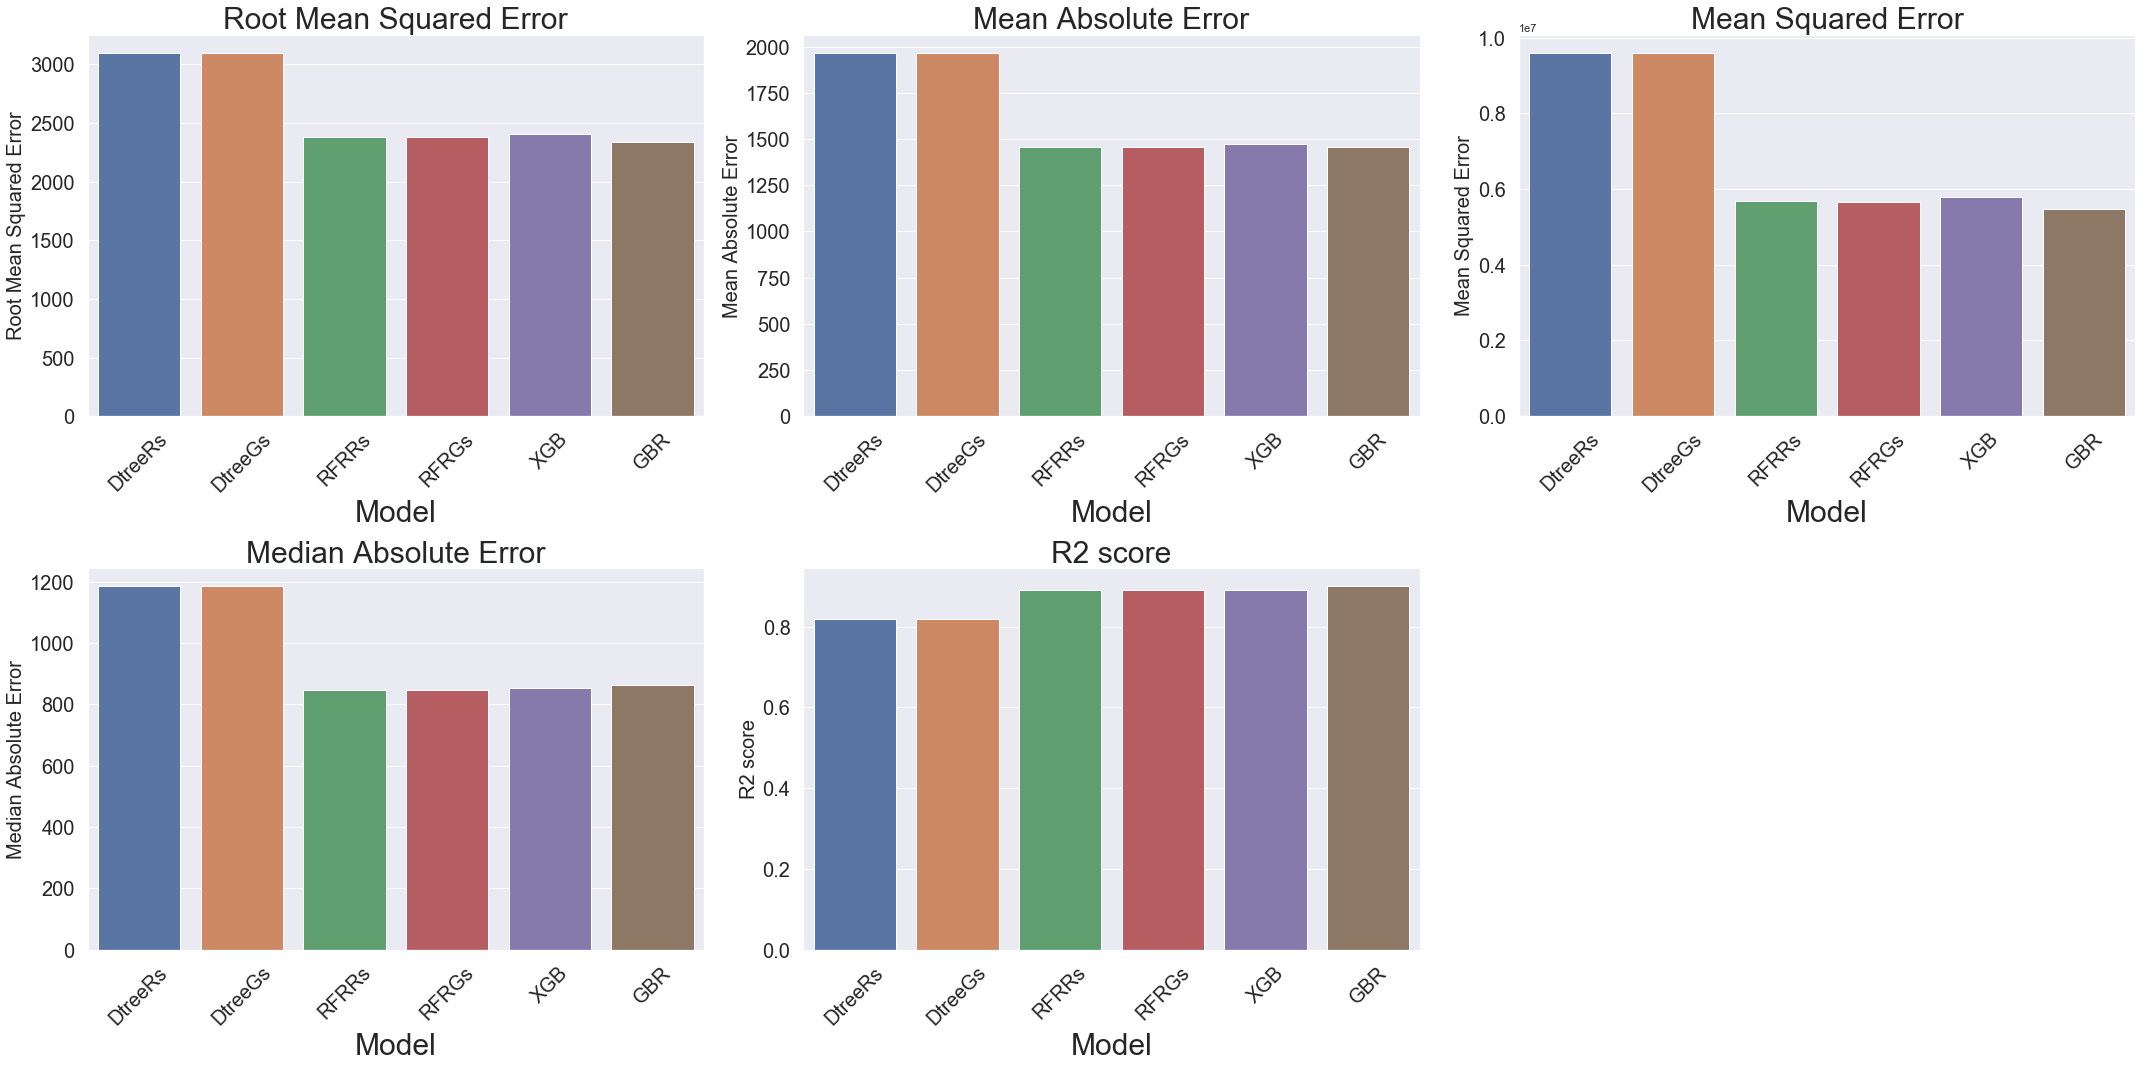

In [535]:
fig = plt.figure(figsize=(30,15))
gs = GridSpec(2,3)

eval_metric_parameters = list(columns.get_level_values(0).unique())
eval_model_names = list(columns.get_level_values(1).unique())
eval_metric_parameters_cnt = []

for i in range(2):
    position = 0
    for j in range(3):
        cnt = i*2+j
        if cnt not in eval_metric_parameters_cnt:
            eval_metric_parameters_cnt.append(cnt)
            current_metric_parameter = eval_metric_parameters[i*2+j]
            current_data = metricDfTranspose.loc[current_metric_parameter].reset_index()
            sns.barplot(data=current_data,x='Model',y='Average',ax=fig.add_subplot(gs[i,position]))
            plt.title(current_metric_parameter,size=30)
            plt.xticks(size=20,rotation=45)
            plt.yticks(size=20)
            plt.xlabel("Model",size=30)
            plt.ylabel(current_metric_parameter,size=20)
            position += 1

plt.tight_layout()

In [540]:
dfMetrics = metricDfTranspose.loc['Root Mean Squared Error'].reset_index()
dfMetrics.to_csv('dfMetrics.csv')

In [545]:
dfMetrics['Model'].values

array(['DtreeRs', 'DtreeGs', 'RFRRs', 'RFRGs', 'XGB', 'GBR'], dtype=object)

# [Selection]

Based on graph above then i choose Gradient Boosting Regression as my model because has the lowest value of RMSE

In [365]:
gbr = GradientBoostingRegressor(min_samples_split=gbrRsMinSamplesSplit, 
                                  min_samples_leaf=gbrRsMinSamplesLeaf, 
                                  max_leaf_nodes= gbrRsMaxLeafNodes,
                                  max_features=gbrRsMaxFeatures, 
                                  max_depth= gbrRsMaxDepth)
gbr.fit(X_train,y_train)
y_test_GbrRandomSearch_pred = gbr.predict(X_test)



In [719]:
rmse = np.sqrt(mean_squared_error(y_test, y_test_GbrRandomSearch_pred))
meanYtest = y_test.mean()
accrcy = round((1 - (rmse/meanYtest)) * 100,2)

print('RMSE Result for X_test ')
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_GbrRandomSearch_pred)))
print('Average of y_test : ',y_test.mean())






RMSE Result for X_test 
RMSE: 2382.4918155177047
Average of y_test :  10445.066710703695


In [ ]:
select nama, avg(price) as rata_harga 
from table group by nama having rata_harga > 
(select avg(price) from table where nama = 'mercedes')


## Deploy

In [726]:
import pickle
filename = 'priceUsedCar_gb_model.sav'
pickle.dump(gbr, open(filename, 'wb'))